In [1]:
!pip install pandas numpy scikit-learn pydotplus matplotlib

     |████████████████████████████████| 9.7 MB 43 kB/s eta 0:00:012
     |████████████████████████████████| 15.4 MB 149 kB/s  eta 0:00:01
     |████████████████████████████████| 24.9 MB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 278 kB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 27.2 MB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 303 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 22.2 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=54fff2179f84f961c1f2c75c5644d0163f00752925380cf96360428f1df37b86
  Stored in directory: /home/camila/.cache/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [28]:
import os 
import glob
import pandas as pd



import numpy as np
import urllib
import sklearn as sk
from sklearn import tree
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from sklearn.externals.six import StringIO 
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
import pydotplus


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor


import matplotlib

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import time



In [2]:
combined_csv = pd.read_csv('combined_data.csv').drop(['Unnamed: 0'], axis = 1)

In [3]:
print(combined_csv.shape)


(2830743, 79)


In [6]:
'''
os.chdir("/home/camila/workspace/ml-ids")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)
'''

['Tuesday-WorkingHours.pcap_ISCX.csv', 'Wednesday-workingHours.pcap_ISCX.csv', 'Monday-WorkingHours.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 'Friday-WorkingHours-Morning.pcap_ISCX.csv']


In [7]:
'''
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
'''

In [4]:
combined_csv = combined_csv.rename(columns=str.lower)

In [5]:
combined_csv.columns = combined_csv.columns.str.lstrip()

In [6]:
combined_csv.columns = combined_csv.columns.str.replace(' ','_')

In [7]:
combined_csv.head(5)

destination_port  flow_duration  total_fwd_packets  total_backward_packets  \
0                88            640                  7                       4   
1                88            900                  9                       4   
2                88           1205                  7                       4   
3                88            511                  7                       4   
4                88            773                  9                       4   

   total_length_of_fwd_packets  total_length_of_bwd_packets  \
0                          440                          358   
1                          600                         2944   
2                         2776                         2830   
3                          452                          370   
4                          612                         2944   

   fwd_packet_length_max  fwd_packet_length_min  fwd_packet_length_mean  \
0                    220                      0               62.857143   
1                    300                      0               66.666667   
2                   1388                      0              396.571429   
3                    226                      0               64.571429   
4                    306                      0               68.000000   

   fwd_packet_length_std  ...  min_seg_size_forward  active_mean  active_std  \
0             107.349008  ...                    20          0.0         0.0   
1             132.287566  ...                    20          0.0         0.0   
2             677.274651  ...                    20          0.0         0.0   
3             110.276708  ...                    20          0.0         0.0   
4             134.933317  ...                    20          0.0         0.0   

   active_max  active_min  idle_mean  idle_std  idle_max  idle_min   label  
0           0           0        0.0       0.0         0         0  BENIGN  
1           0           0        0.0       0.0         0         0  BENIGN  
2           0           0        0.0       0.0         0         0  BENIGN  
3           0           0        0.0       0.0         0         0  BENIGN  
4           0           0        0.0       0.0         0         0  BENIGN  

[5 rows x 79 columns]

In [8]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [9]:
combined_csv.isnull().any().any()

True

In [10]:
combined_csv = combined_csv.replace([np.inf, -np.inf], np.nan)
combined_csv = combined_csv.dropna()
combined_csv.isnull().any().any()

False

In [11]:
combined_csv['label'].value_counts()


BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

In [12]:
combined_csv = combined_csv.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
combined_csv = combined_csv.dropna()

In [13]:
combined_csv["label"] =  combined_csv.label.str.replace('[^\x00-\x7F]','')

combined_csv["label"] = combined_csv.label.replace('\s+', ' ', regex=True)

<ipython-input-13-7fb2704f4801>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_csv["label"] =  combined_csv.label.str.replace('[^\x00-\x7F]','')


In [14]:
combined_csv['label'].value_counts()

BENIGN                    2271320
DoS Hulk                   230124
PortScan                   158804
DDoS                       128025
DoS GoldenEye               10293
FTP-Patator                  7935
SSH-Patator                  5897
DoS slowloris                5796
DoS Slowhttptest             5499
Bot                          1956
Web Attack Brute Force       1507
Web Attack XSS                652
Name: label, dtype: int64

In [15]:
combined_csv['network_flow'] = np.where(combined_csv['label'] == 'BENIGN', 0, 1)

In [16]:
attack_description = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Web Attack Brute Force': 'web_attack', 
                'Web Attack XSS': 'web_attack'}

combined_csv['network_flow_description'] = combined_csv['label'].map(lambda x: attack_description[x])
combined_csv['network_flow_description'].value_counts()

benign         2271320
dos             251712
probe           158804
ddos            128025
brute_force      13832
web_attack        2159
botnet            1956
Name: network_flow_description, dtype: int64

Text(0.5, 1.0, 'Quantity of bad and good network flow')

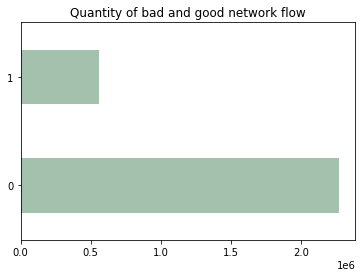

In [17]:
network_flow_counts = combined_csv['network_flow'].value_counts()
network_flow_counts.plot(kind='barh', color='#a3c1ad')
plt.title('Quantity of bad and good network flow') 

##4169E1

Text(0.5, 1.0, 'Grouped Network Flow Types')

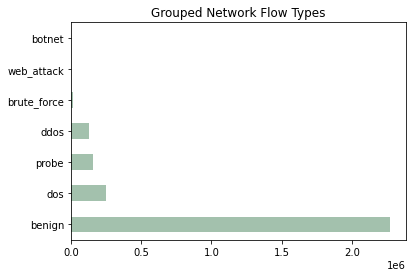

In [21]:
train_attacks = combined_csv['network_flow_description'].value_counts()
train_attacks.plot(kind='barh', color='#a3c1ad')
plt.title('Grouped Network Flow Types')

In [18]:
labels = ['label', 'network_flow', 'network_flow_description']
xs = combined_csv.drop(labels, axis=1) 
ys = combined_csv[['label', 'network_flow', 'network_flow_description']] 

x_train, x_temp, y_train, y_temp = train_test_split(xs, ys, test_size=0.4, random_state=1, stratify=ys['label'])
x_test, x_validate, y_test, y_validate = train_test_split(x_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp['label'])

In [9]:
remove_n = 2730743
drop_indices = np.random.choice(combined_csv.index, remove_n, replace=False)
df_subset = combined_csv.drop(drop_indices)
print(df_subset.shape)


In [24]:
min_max_scaler = MinMaxScaler().fit(x_train)

x_train = min_max_scaler.transform(x_train)
x_validate = min_max_scaler.transform(x_validate)
x_test = min_max_scaler.transform(x_test)

pd.Series(x_train.flatten()).describe()

count    1.323414e+08
mean     8.997153e-02
std      2.586398e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.166667e-07
75%      4.757337e-03
max      1.000000e+00
dtype: float64

In [21]:
#
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

fit = features.fit(x_train, y_train.label)

In [22]:
fit

SelectKBest(k=78, score_func=<function chi2 at 0x7fb35004c1f0>)

In [26]:

features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train.label)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)
x_validate = fit.transform(x_validate)

In [23]:
combined_csv_copy = combined_csv.columns[features.get_support(indices=True)]
combined_csv_copy


Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [30]:
# importance weights of the attacks with sklearn-RandomForestRegressor
seconds = time.time()
clft = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
clft.fit(x_train, y_train.network_flow)


In [32]:
values_importances = clft.feature_importances_
print(values_importances)

[1.55478136e-01 8.81884446e-04 4.38907707e-04 1.33694212e-04
 6.57876569e-04 1.59114076e-04 3.76808690e-03 4.63032623e-04
 1.04371550e-04 9.46030643e-04 7.54887102e-04 4.17561371e-04
 1.24379714e-03 3.77049831e-01 1.17201402e-03 2.84521012e-03
 1.60519051e-03 1.40481202e-03 8.56566811e-04 5.55928630e-03
 4.69176660e-04 3.81596101e-03 1.88875236e-04 7.98976279e-04
 9.70795461e-04 5.66690911e-05 1.04452771e-03 2.00143270e-03
 8.33242292e-05 1.18271350e-03 3.01448289e-04 0.00000000e+00
 1.17824117e-07 0.00000000e+00 8.77236049e-07 6.85971902e-06
 3.62288711e-03 1.82835254e-03 3.14688814e-04 1.78328768e-04
 1.49582292e-03 6.27324196e-02 6.20984468e-04 4.07692159e-05
 2.83912268e-04 7.33487698e-08 2.88863257e-03 1.92229854e-02
 7.36253846e-04 0.00000000e+00 2.94956500e-08 2.40266086e-04
 1.95834407e-01 9.20975945e-05 1.32915824e-03 1.24156632e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.28042479e-04 6.65622207e-04
 1.03923138e-04 1.566780

In [52]:
names_col = list(combined_csv.columns.values)[0:78] #[::-1]
print(names_col)

['destination_port', 'flow_duration', 'total_fwd_packets', 'total_backward_packets', 'total_length_of_fwd_packets', 'total_length_of_bwd_packets', 'fwd_packet_length_max', 'fwd_packet_length_min', 'fwd_packet_length_mean', 'fwd_packet_length_std', 'bwd_packet_length_max', 'bwd_packet_length_min', 'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length', 'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s', 'min_packet_length', 'max_packet_length', 'packet_length_mean', 'packet_length_std', 'packet_length_variance', 'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 'psh_flag_count', 'ack_flag_count', 'urg_flag_count', 'cwe_flag_count', 'ece_flag_count

In [66]:
teste = pd.DataFrame({'Features relevance':names_col,'importance':values_importances})
print(teste)

             Features relevance  importance
0              destination_port    0.155478
1                 flow_duration    0.000882
2             total_fwd_packets    0.000439
3        total_backward_packets    0.000134
4   total_length_of_fwd_packets    0.000658
..                          ...         ...
73                   active_min    0.000027
74                    idle_mean    0.000046
75                     idle_std    0.000061
76                     idle_max    0.000044
77                     idle_min    0.000072

[78 rows x 2 columns]


In [67]:
features_importance = teste.sort_values('importance',ascending=False).set_index('Features relevance')
features_importance.head(25)

importance
Features relevance                 
bwd_packet_length_std      0.377050
average_packet_size        0.195834
destination_port           0.155478
init_win_bytes_backward    0.110406
packet_length_std          0.062732
init_win_bytes_forward     0.026695
ack_flag_count             0.019223
flow_iat_min               0.005559
fwd_iat_mean               0.003816
fwd_packet_length_max      0.003768
fwd_packets/s              0.003623
psh_flag_count             0.002889
flow_packets/s             0.002845
active_std                 0.002154
bwd_iat_std                0.002001
bwd_packets/s              0.001828
flow_iat_mean              0.001605
packet_length_mean         0.001496
flow_iat_std               0.001405
avg_bwd_segment_size       0.001329
bwd_packet_length_mean     0.001244
bwd_iat_min                0.001183
flow_bytes/s               0.001172
bwd_iat_mean               0.001045
fwd_iat_min                0.000971

In [72]:
features_importance["importance"]=features_importance["importance"].astype(float)



In [75]:
 #ax = features_importance.plot.bar(x='importance', rot=0)
plotdata['features_importance'].plot(kind="bar")


NameError: name 'plotdata' is not defined

In [30]:
 attack = np.array(['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                   'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'XSS'])
attack_groups = np.array(['benign', 'botnet', 'brute_force', 'ddos', 'dos', 'probe', 'web_attack'])